ДЗ - обучить при помощи tf (keras) API любое ДЗ по обучениею классических моделей. 
Можно сдавать на торче.
Дедлайн 09.03

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras import backend as K
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.layers import Dropout

In [24]:
# Загрузка датасета
data = pd.read_csv('Walmart.csv')

In [25]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [26]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=1)

Вместо даты определим времена года, которые могут вляить на целевую переменную

In [27]:
# Определяем времена года
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'

# Применяем функцию к колонке с датой
data['season'] = data['Date'].apply(get_season)

# Создаем бинарные колонки для каждого времени года
data = pd.get_dummies(data, columns=['season'], prefix='', prefix_sep='')



In [28]:
data = data.drop('Date', axis=1) # Удаляем даты

In [29]:
y = data['Weekly_Sales']
X = data.drop('Weekly_Sales', axis=1)

In [30]:
# 1. Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,autumn,spring,summer,winter
1033,8,0,75.32,2.582,214.878556,6.315,True,False,False,False
915,7,0,20.70,3.372,192.058484,8.818,False,True,False,False
5903,42,0,61.24,3.130,126.546161,9.003,True,False,False,False
2083,15,0,69.19,3.906,136.213613,7.806,False,False,True,False
5943,42,0,87.40,3.743,129.240581,8.257,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
3772,27,0,39.32,3.420,137.251185,7.827,False,False,False,True
5191,37,0,54.44,2.708,210.376263,8.476,False,False,False,True
5226,37,0,86.71,3.684,214.297294,8.177,False,False,True,False
5390,38,1,44.64,3.428,130.071032,12.890,False,False,False,True


In [32]:

# 2. Нормализация данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)

In [79]:
# 3. Создаем нейронную сеть
model = Sequential([
    Dense(256, activation='elu', input_shape=(X_train_np.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Выходной слой для регрессии
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

# Создаем объект Huber Loss
huber_loss = Huber()

model.compile(
    optimizer=Adam(learning_rate=0.04),
     loss=huber_loss,  # Используем Huber Loss
    metrics=[RootMeanSquaredError(), MeanAbsoluteError()]
)

Epoch 1/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 777634.5000 - mean_absolute_error: 777634.9375 - root_mean_squared_error: 939643.9375 - val_loss: 428212.9375 - val_mean_absolute_error: 428213.5000 - val_root_mean_squared_error: 534863.6875
Epoch 2/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 423523.6250 - mean_absolute_error: 423524.1875 - root_mean_squared_error: 534002.0625 - val_loss: 401462.1250 - val_mean_absolute_error: 401462.5625 - val_root_mean_squared_error: 498163.3125
Epoch 3/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 411784.1875 - mean_absolute_error: 411784.6875 - root_mean_squared_error: 516343.4062 - val_loss: 394778.0312 - val_mean_absolute_error: 394778.5312 - val_root_mean_squared_error: 495042.3438
Epoch 4/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 387255.4062 - mean_absolute_error: 387255.8750 - root_mean_squared_error: 498398.2500 - val_loss: 389682.0625 - val_mean_absolute_error: 389682.5938 - val_root_mean_squared_error: 501032.1

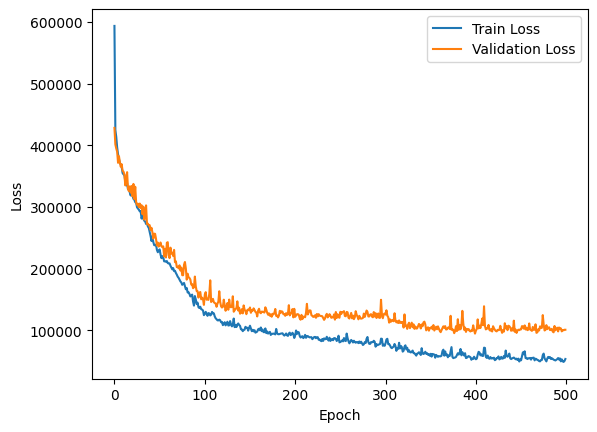

In [81]:

# Обучаем модель
history = model.fit(
    X_train_np, y_train_np,
    epochs=500,
    batch_size=48,
    validation_split=0.2,
    verbose=1
)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test_np)

# Вычисляем метрики
test_mse = mean_squared_error(y_test_np, y_pred)
test_rmse = np.sqrt(test_mse)  # RMSE
test_mae = mean_absolute_error(y_test_np, y_pred)
test_r2 = r2_score(y_test_np, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")  # Выводим RMSE
print(f"Test MAE: {test_mae}")
print(f"Test R^2: {test_r2}")

# Визуализация процесса обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

В результате работы выполнен подбор параметров и обучение нейронной сети на базе Tensorflow.
Лучший результат получен при использовании 4 слоев, функции потерь Huber Loss и функции активации Elu у первого слоя. 
Полученный результат сопоставим, но несколько хуже использовавшегося ранее для решения этой задачи градиентного бустинга (scikit-learn).
GradientBoostingRegressor:
 - R2: 0.9442
 - RMSE: 133568
TensorFlow:
 - R2: 0.887
 - RMSE: 190261